# EDA metabric data (including clinical patient and sample data)

clinical patient data と clinical sample data の分析  
どちらも患者データに属する. 


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import *
import sweetviz as sv
import dtale

sns.set_style("darkgrid")
sns.set(font=['IPAPGothic'])


In [3]:
def save_df_as_csv(df, save_name):
    df.to_csv(INTERIM_DIR+'/'+save_name+'.csv', index=False)

# データ全体

データ概要の表示  
MB-XXXXとMTS-TXXXX両方を含めた全体での欠損値などを見ていく

In [4]:
df_metabric=pd.read_table(RAW_DIR+'/brca_metabric_clinical_data.tsv')
df_metabric.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [5]:
df_metabric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study ID                        2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

In [6]:
#dtale.show(df_metabric)

In [7]:
df_metabric.shape

(2509, 39)

In [8]:
# 欠損値の個数
df_metabric.isnull().sum()

Study ID                            0
Patient ID                          0
Sample ID                           0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    151
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Surv

# データ分割

IDをMB-XXXXとMTS-TXXXXに分けて、データの密度の高いMB-XXXXについてデータの分布や欠損値を見ていく  
加えてCancer-Type毎にもデータを分け、以降の分析、モデル構築に役立てる

## ID分割

MB-XXXXとMTS-TXXXXでデータを分割し、保存もする

In [9]:
df_metabric_MB=df_metabric[df_metabric['Patient ID'].str.contains('MB')]
df_metabric_MTST=df_metabric[df_metabric['Patient ID'].str.contains('MTS-T')]

In [10]:
df_metabric_MB.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Number of Samples Per Patient,TMB (nonsynonymous),Tumor Size,Tumor Stage
count,1985.000000,1985.000000,1897.000000,1909.000000,1864.000000,1984.000000,1981.000000,1985.000000,1985.0,1985.000000,1959.000000,1470.000000
mean,61.100544,2.616121,2.414338,2.004715,5.711910,4.013186,125.244271,110.117406,1.0,6.993408,26.273486,1.736735
std,12.948374,1.233252,0.648891,4.080490,4.073815,1.163166,76.111772,76.297209,0.0,5.437249,15.368776,0.641813
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000
25%,51.450000,1.000000,2.000000,0.000000,3.000000,3.044000,60.866667,41.740000,1.0,3.922553,17.000000,1.000000
50%,61.840000,3.000000,3.000000,0.000000,5.000000,4.042000,116.466667,100.720000,1.0,6.537589,23.000000,2.000000
75%,70.610000,3.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.760000,1.0,9.152624,30.000000,2.000000
max,96.290000,5.000000,3.000000,45.000000,81.000000,6.680000,355.200000,346.380000,1.0,104.601416,182.000000,4.000000


In [11]:
df_metabric_MTST.describe()

,Age at Diagnosis,Cohort,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Number of Samples Per Patient,TMB (nonsynonymous),Tumor Size,Tumor Stage
count,513.000000,513.000000,491.000000,334.000000,494.000000,303.000000,0.0,403.000000,524.0,524.000000,401.000000,318.000000
mean,57.788168,4.000000,2.403259,1.640719,5.133603,4.130937,NaN,102.562804,1.0,6.305529,25.959252,1.606918
std,13.037440,3.370367,0.651771,3.628750,3.619639,1.344243,NaN,77.394361,0.0,4.818393,15.397713,0.705688
min,27.000000,1.000000,1.000000,0.000000,1.000000,1.140000,NaN,0.030000,1.0,0.000000,1.000000,0.000000
25%,47.550000,1.000000,2.000000,0.000000,3.000000,3.280000,NaN,37.170000,1.0,2.615035,15.000000,1.000000
50%,58.000000,1.000000,2.000000,0.000000,4.000000,4.320000,NaN,86.880000,1.0,5.230071,22.000000,2.000000
75%,67.000000,7.000000,3.000000,2.000000,7.000000,5.000000,NaN,166.890000,1.0,7.845106,30.000000,2.000000
max,89.000000,9.000000,3.000000,30.000000,35.000000,7.200000,NaN,384.210000,1.0,45.763120,130.000000,4.000000


In [12]:
df_metabric_MB.isnull().sum()

Study ID                            0
Patient ID                          0
Sample ID                           0
Age at Diagnosis                    0
Type of Breast Surgery             30
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                        68
Chemotherapy                        5
Pam50 + Claudin-low subtype         5
Cohort                              0
ER status measured by IHC          43
ER Status                           0
Neoplasm Histologic Grade          88
HER2 status measured by SNP6        5
HER2 Status                         5
Tumor Other Histologic Subtype     46
Hormone Therapy                     5
Inferred Menopausal State           5
Integrative Cluster                 5
Primary Tumor Laterality          115
Lymph nodes examined positive      76
Mutation Count                    121
Nottingham prognostic index         1
Oncotree Code                       0
Overall Survival (Months)           4
Overall Surv

In [13]:
df_metabric_MB.nunique()==1

Study ID                           True
Patient ID                        False
Sample ID                         False
Age at Diagnosis                  False
Type of Breast Surgery            False
Cancer Type                       False
Cancer Type Detailed              False
Cellularity                       False
Chemotherapy                      False
Pam50 + Claudin-low subtype       False
Cohort                            False
ER status measured by IHC         False
ER Status                         False
Neoplasm Histologic Grade         False
HER2 status measured by SNP6      False
HER2 Status                       False
Tumor Other Histologic Subtype    False
Hormone Therapy                   False
Inferred Menopausal State         False
Integrative Cluster               False
Primary Tumor Laterality          False
Lymph nodes examined positive     False
Mutation Count                    False
Nottingham prognostic index       False
Oncotree Code                     False


他の列と重複しているcolumnと内容が唯一のcolumnをdrop(df_metabric_MB_modified)

In [14]:
df_metabric_MB.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

In [15]:
# 削除する列
# 理由：一意のみの情報、インデックス、他の列と同意

drop_columns=[
    'Study ID',
    'Patient ID',
    'Number of Samples Per Patient',
    'Sample Type',
    'Sex',
    'Oncotree Code',
    'Cancer Type',
]


df_metabric_MB_modified=df_metabric_MB.T.drop_duplicates().T.drop(drop_columns, axis=1)
df_metabric_MB_modified.shape

(1985, 31)

In [16]:
df_metabric_MB_modified.nunique()

Age at Diagnosis                  1624
Type of Breast Surgery               2
Cancer Type Detailed                 8
Cellularity                          3
Chemotherapy                         2
Pam50 + Claudin-low subtype          7
Cohort                               5
ER status measured by IHC            2
ER Status                            2
Neoplasm Histologic Grade            3
HER2 status measured by SNP6         4
HER2 Status                          2
Tumor Other Histologic Subtype       8
Hormone Therapy                      2
Inferred Menopausal State            2
Integrative Cluster                 11
Primary Tumor Laterality             2
Lymph nodes examined positive       31
Mutation Count                      30
Nottingham prognostic index        323
Overall Survival (Months)         1743
Overall Survival Status              2
PR Status                            2
Radio Therapy                        2
Relapse Free Status (Months)      1716
Relapse Free Status      

In [17]:
df_metabric_MB_modified.isnull().sum()

Age at Diagnosis                    0
Type of Breast Surgery             30
Cancer Type Detailed                0
Cellularity                        68
Chemotherapy                        5
Pam50 + Claudin-low subtype         5
Cohort                              0
ER status measured by IHC          43
ER Status                           0
Neoplasm Histologic Grade          88
HER2 status measured by SNP6        5
HER2 Status                         5
Tumor Other Histologic Subtype     46
Hormone Therapy                     5
Inferred Menopausal State           5
Integrative Cluster                 5
Primary Tumor Laterality          115
Lymph nodes examined positive      76
Mutation Count                    121
Nottingham prognostic index         1
Overall Survival (Months)           4
Overall Survival Status             4
PR Status                           5
Radio Therapy                       5
Relapse Free Status (Months)        0
Relapse Free Status                 1
3-Gene class

In [18]:
# dtale.show(df_metabric_MB_modified)

In [19]:
df_metabric_MB.dtypes

Study ID                           object
Patient ID                         object
Sample ID                          object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       

In [20]:
df_metabric_MB_modified.dtypes

Age at Diagnosis                  object
Type of Breast Surgery            object
Cancer Type Detailed              object
Cellularity                       object
Chemotherapy                      object
Pam50 + Claudin-low subtype       object
Cohort                            object
ER status measured by IHC         object
ER Status                         object
Neoplasm Histologic Grade         object
HER2 status measured by SNP6      object
HER2 Status                       object
Tumor Other Histologic Subtype    object
Hormone Therapy                   object
Inferred Menopausal State         object
Integrative Cluster               object
Primary Tumor Laterality          object
Lymph nodes examined positive     object
Mutation Count                    object
Nottingham prognostic index       object
Overall Survival (Months)         object
Overall Survival Status           object
PR Status                         object
Radio Therapy                     object
Relapse Free Sta

In [21]:
df_metabric_MB_modified=df_metabric_MB_modified.astype(
    {
        'Age at Diagnosis': float,
        'Cohort':int,
        'Neoplasm Histologic Grade':float,
        'Lymph nodes examined positive':float,
        'Mutation Count':float,
        'Nottingham prognostic index':float,
        'Overall Survival (Months)':float,
        'Relapse Free Status (Months)':float,
        'TMB (nonsynonymous)':float,
        'Tumor Size':float,
        'Tumor Stage':float,
    }
) 

# Split data following by cancer types detail

がんの種類毎に全体データと比較を行う

In [22]:
df_metabric_MB_modified.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

# columns 対応表
目的変数一覧  

|metabric.csv|outcome.csv|
|-|-|
|Overall Survival Status|OS_STATUS|
|Overall Survival (Months)|OS_MONTHS|
|Relapse Free Status|RFS_STATUS|
|Relapse Free Status (Months)|RFS_MONTHS|
|Patient's Vital Status|VITAL_STATUS|




In [23]:
targets=[
    #"Overall Survival Status",
    "Overall Survival (Months)",
    #"Relapse Free Status",
    "Relapse Free Status (Months)",
    #"Patient's Vital Status"
]

force_num=[
    'Age at Diagnosis', 
    'Cohort', 
    'Neoplasm Histologic Grade',
    'Lymph nodes examined positive',
    'Mutation Count',
    'Nottingham prognostic index',
    'Overall Survival (Months)',
    'Relapse Free Status (Months)',
    'TMB (nonsynonymous)',
    'Tumor Size',
    'Tumor Stage'
]

In [24]:
df_metabric_MB_modified=df_metabric_MB_modified.astype({"Overall Survival (Months)":float})
df_metabric_MB_modified=df_metabric_MB_modified.astype({"Relapse Free Status (Months)":float})

In [25]:
save_df_as_csv(df_metabric_MB_modified, 'df_metabric')

In [26]:
df_metabric_MB_modified.dtypes

Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                              int64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Overall Survival (Months)         float64
Overall Survival Status            object
PR Status                          object
Radio Therapy                     

In [27]:
for i in df_metabric_MB_modified.columns:
    if df_metabric_MB_modified[i].dtype=='object':
        print(i)

Type of Breast Surgery
Cancer Type Detailed
Cellularity
Chemotherapy
Pam50 + Claudin-low subtype
ER status measured by IHC
ER Status
HER2 status measured by SNP6
HER2 Status
Tumor Other Histologic Subtype
Hormone Therapy
Inferred Menopausal State
Integrative Cluster
Primary Tumor Laterality
Overall Survival Status
PR Status
Radio Therapy
Relapse Free Status
3-Gene classifier subtype
Patient's Vital Status


In [30]:

for i in df_metabric_MB_modified.columns:
    if df_metabric_MB_modified[i].dtype=='object':
        dims = (15, 10)
        _, ax = plt.subplots(figsize=dims)
        #sns.boxplot(x=i, y='Overall Survival (Months)', hue='Cancer Type Detailed', data=df_metabric_MB_modified, ax=ax)
        sns.boxplot(x=i, y='Relapse Free Status (Months)', hue='Cancer Type Detailed', data=df_metabric_MB_modified, ax=ax)
        plt.savefig(SEABORN_DIR+"/"+i+".png")


findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.


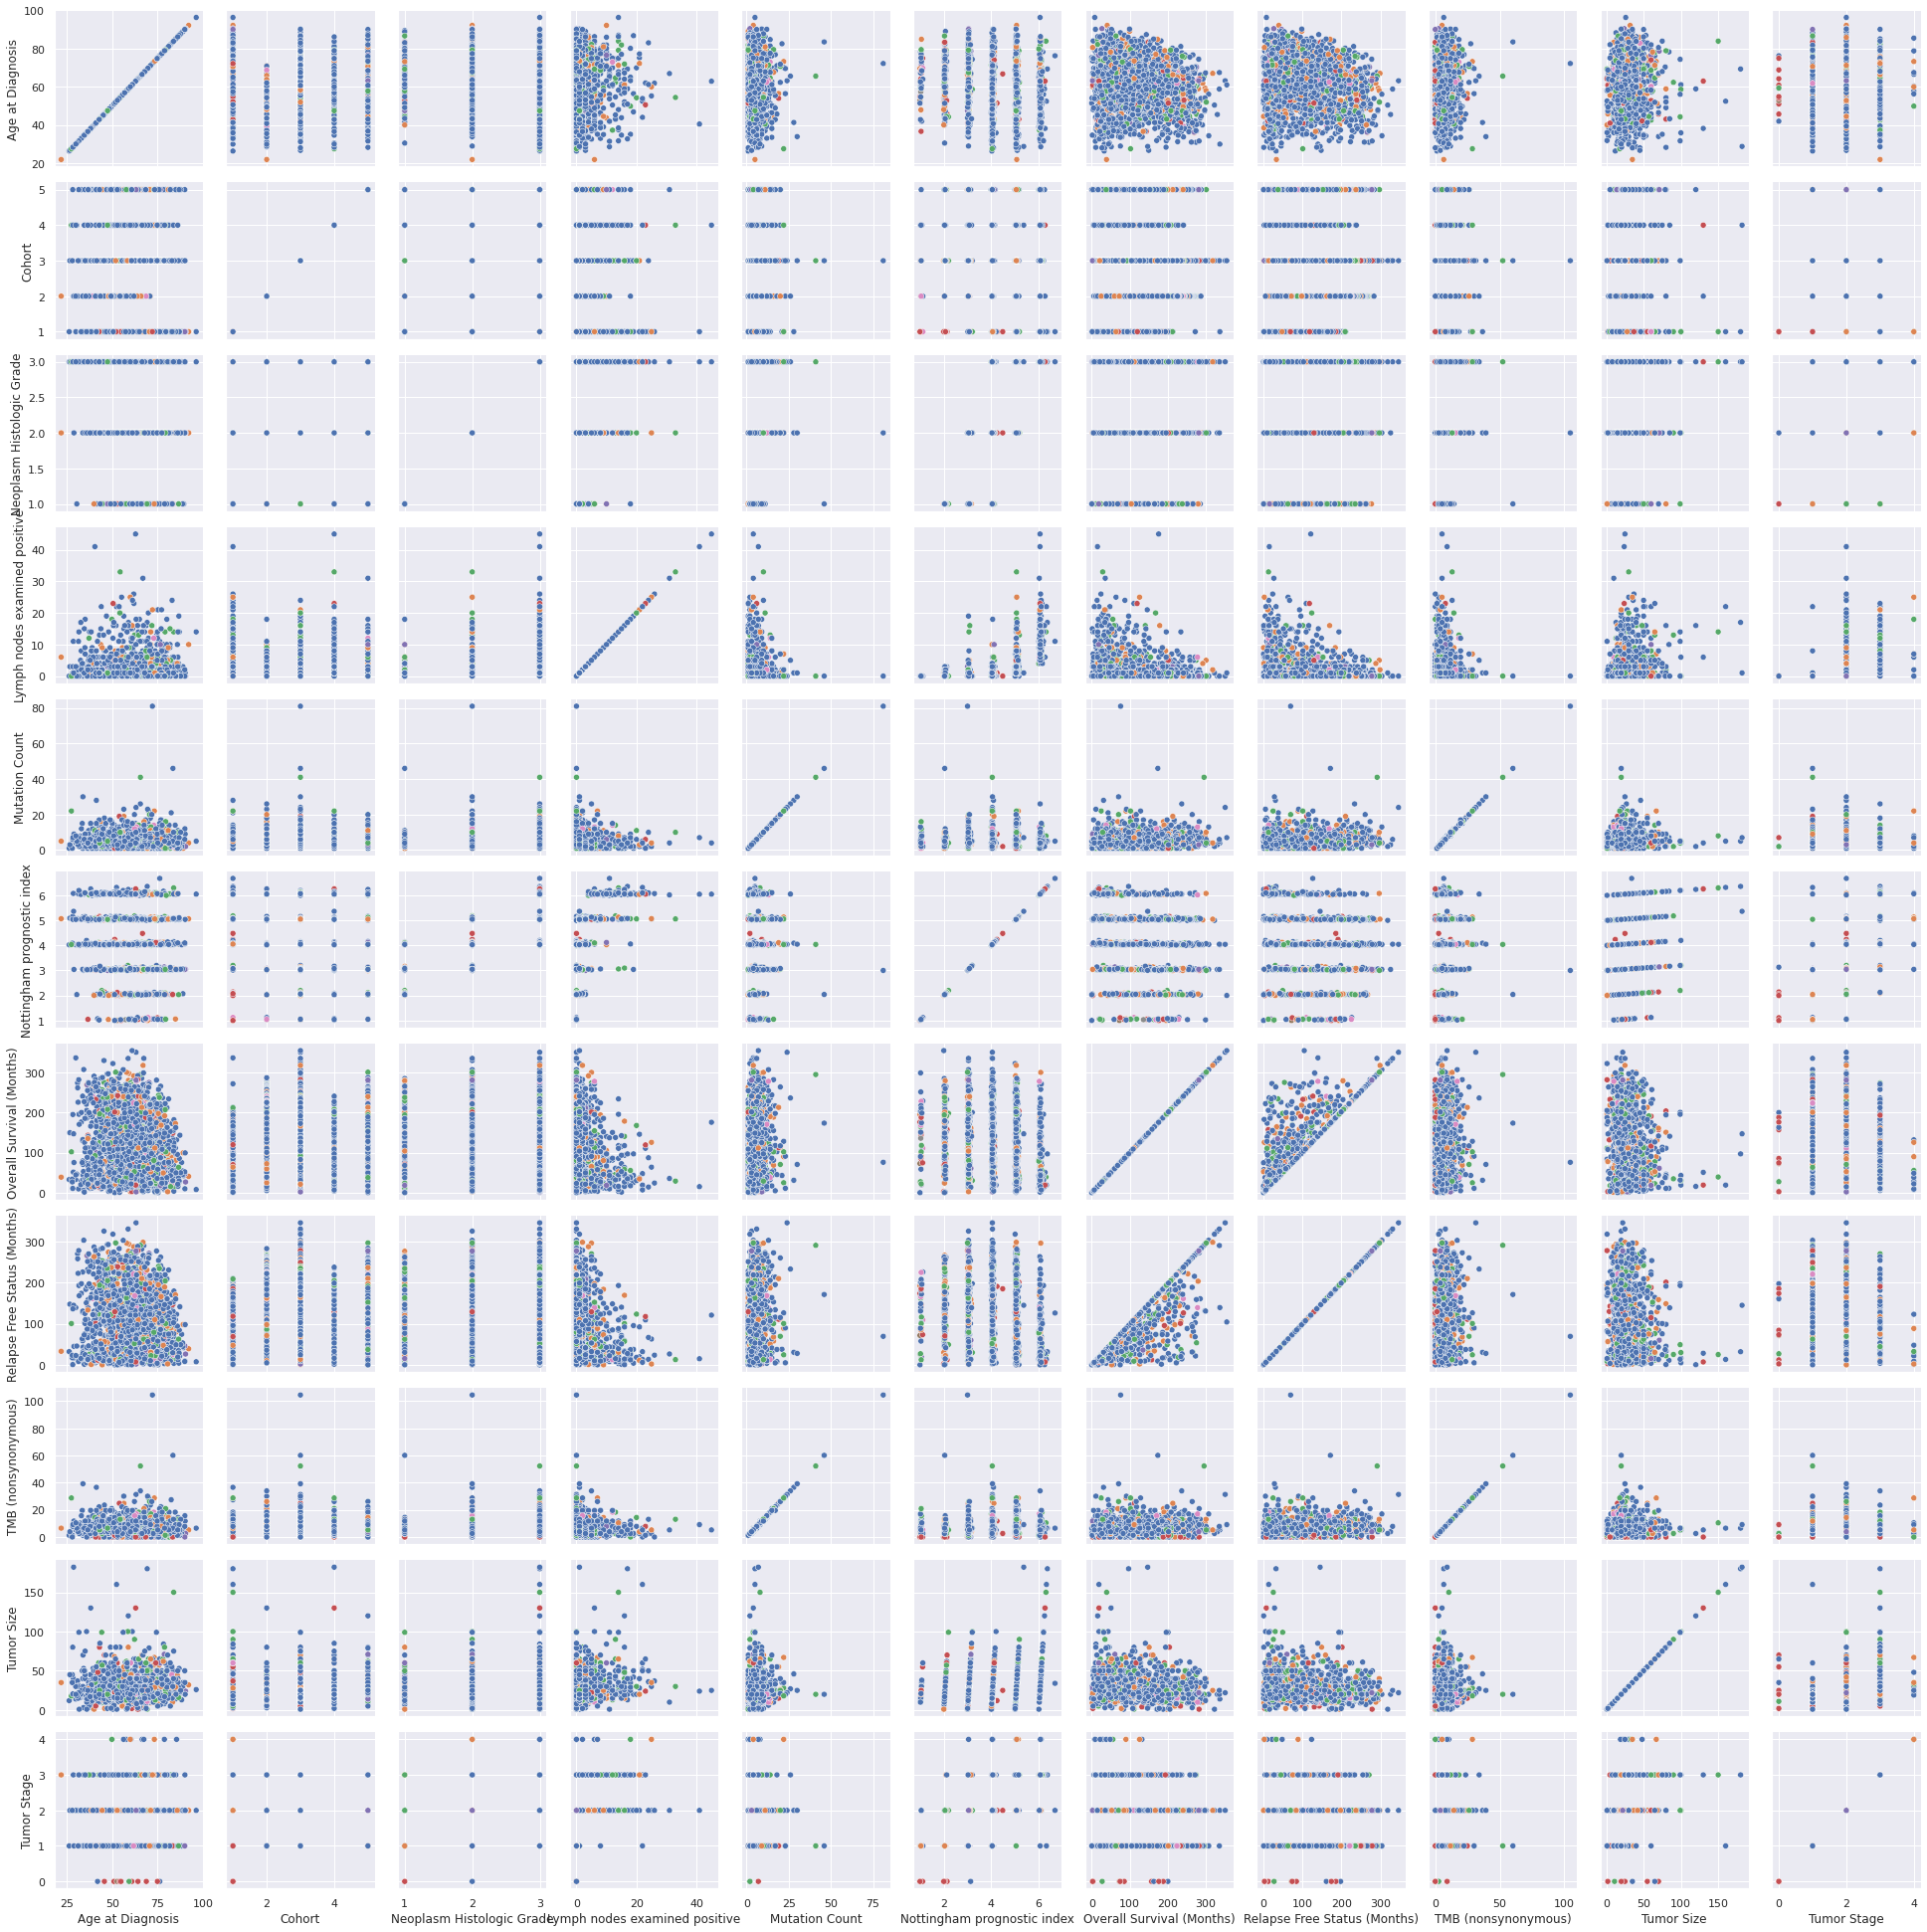

In [53]:
g = sns.PairGrid(df_metabric_MB_modified, hue = "Cancer Type Detailed")
g.map(sns.scatterplot)

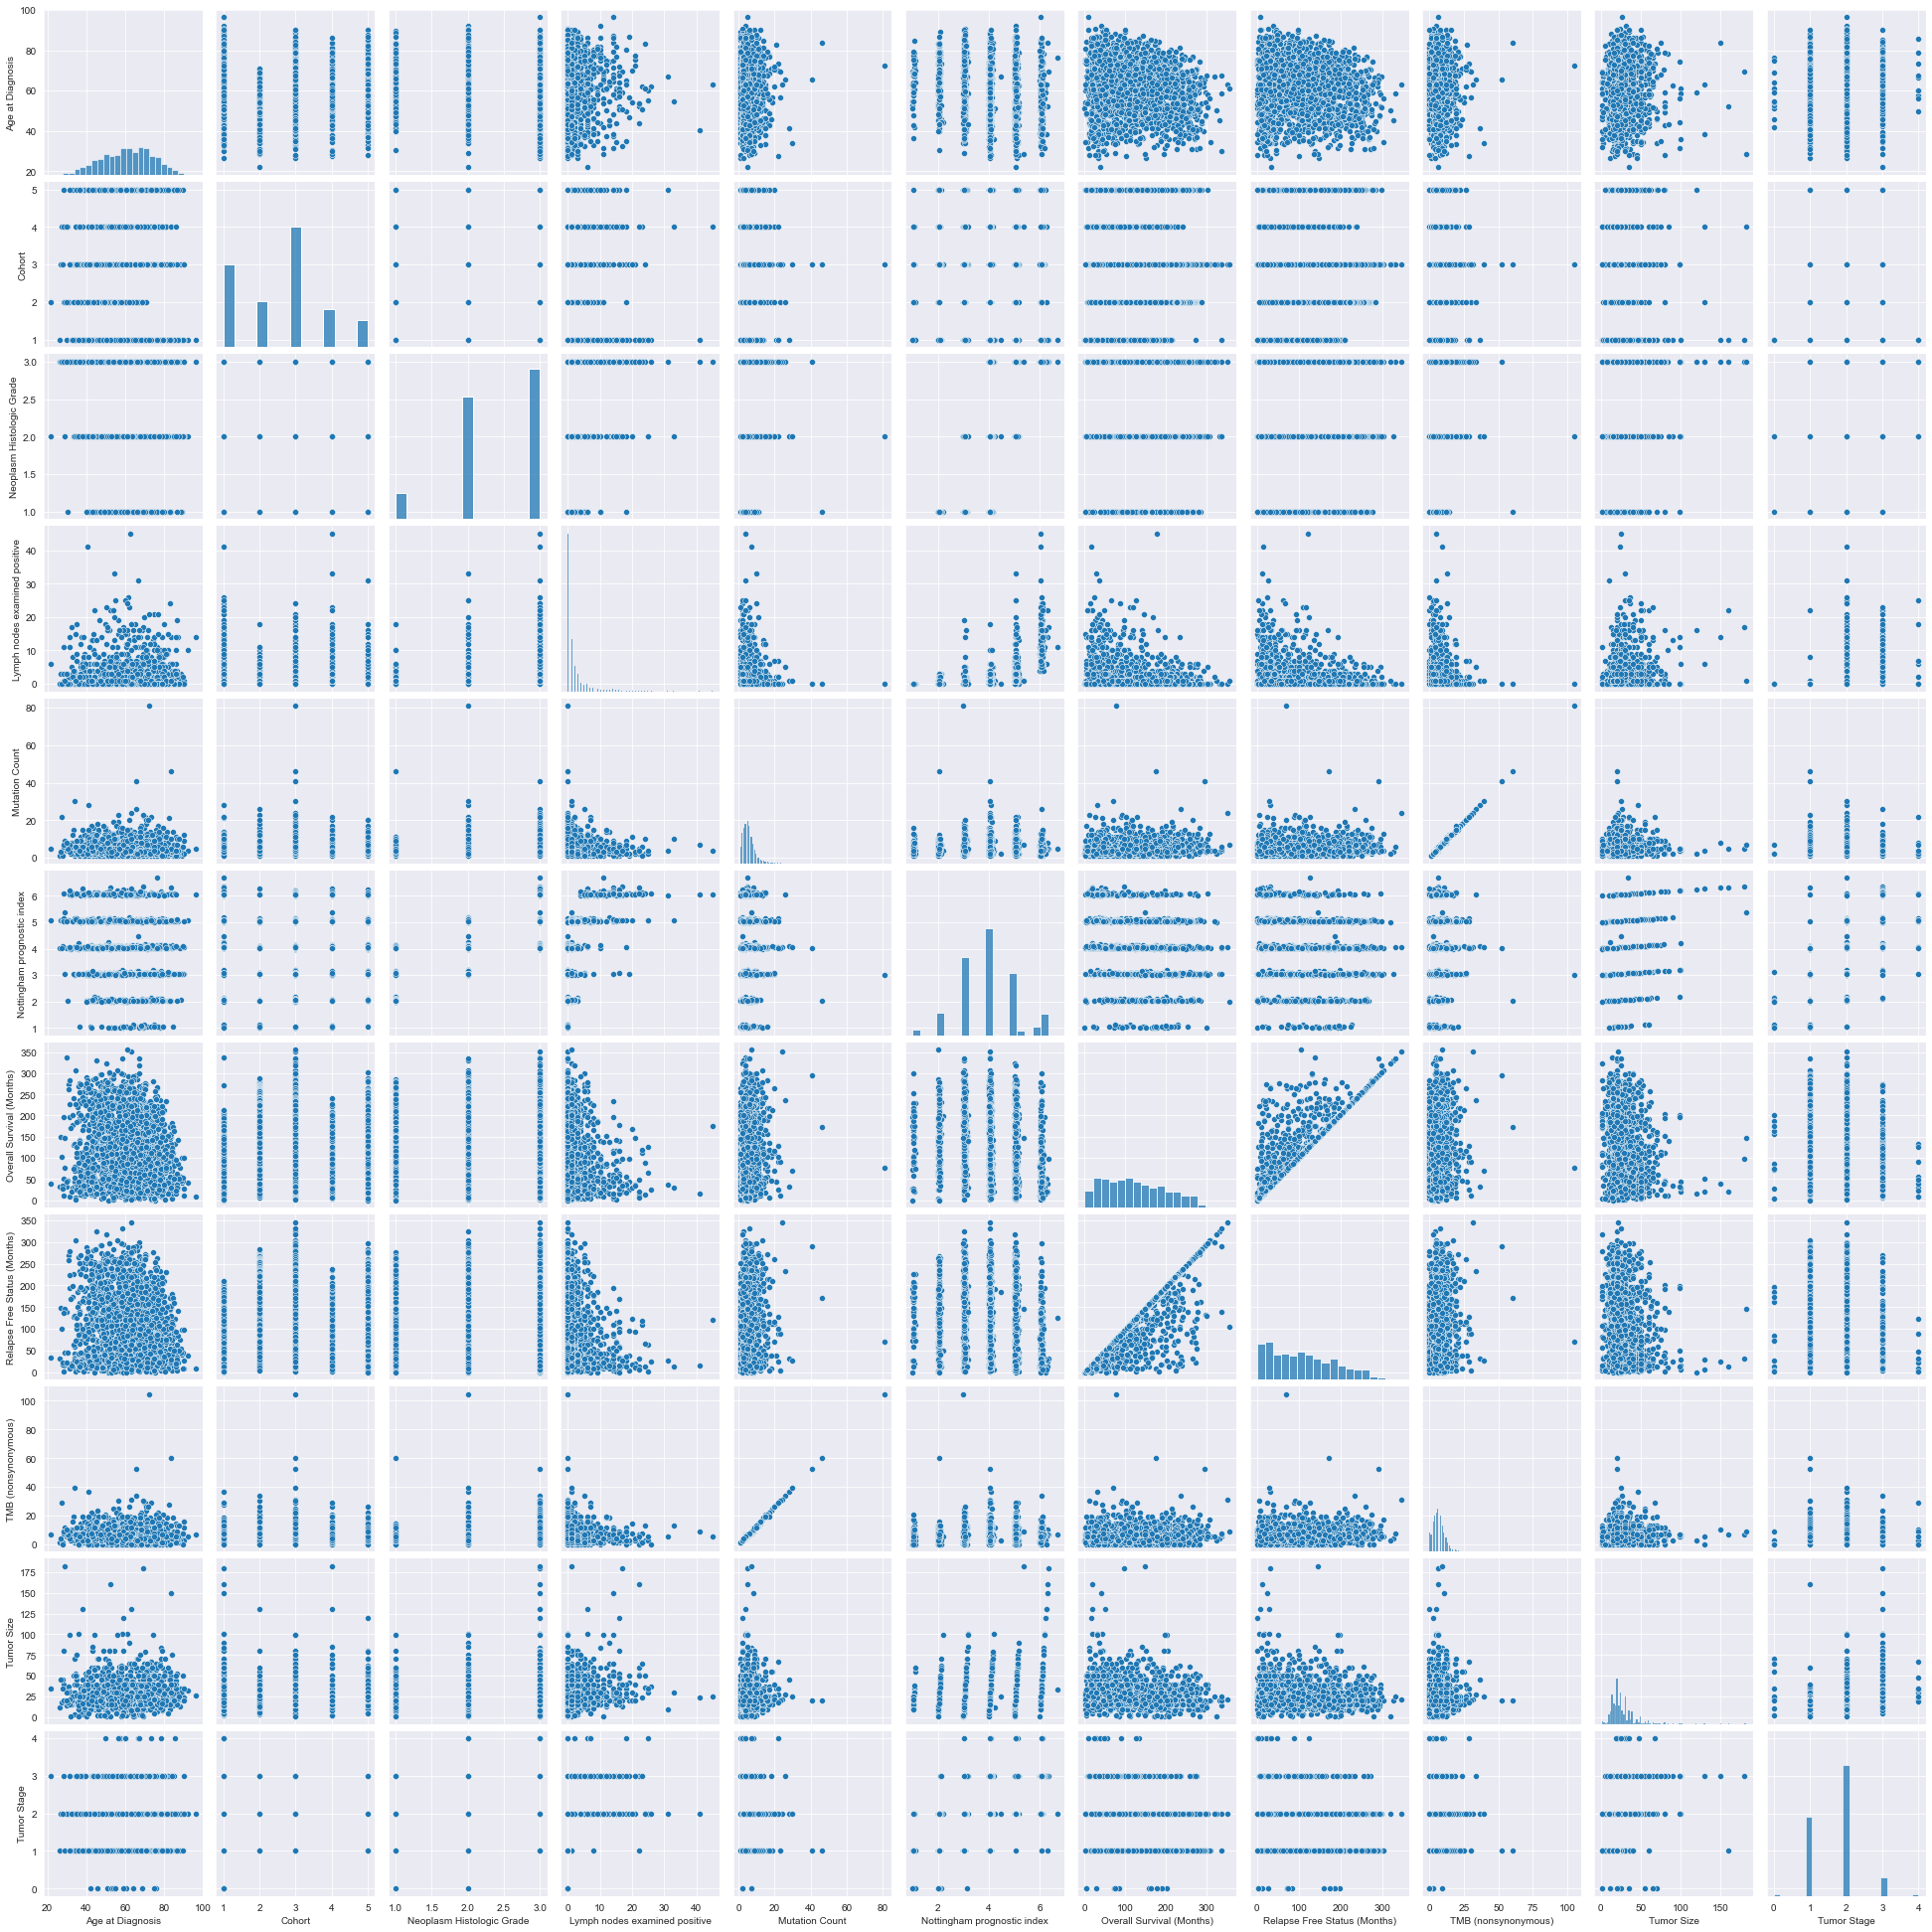

In [50]:
sns.pairplot(df_metabric_MB_modified)

## 全体と各種がんの比較

完全な全体のデータと各種がんのデータの比較を行う

In [24]:
def display_cancer_types_differences(df_base, df_cancer, df_name, path='', target='Overall Survival (Months)'):
    df_base=df_base.dropna(subset=[target])
    df_cancer=df_cancer.dropna(subset=[target])
    
    # remove untarget columns
    rm_targets=targets.copy()
    rm_targets.remove(target)
    rm_targets=rm_targets[0] if len(rm_targets)==1 else rm_targets

    # set dtypes
    tmp_force_num=force_num.copy()
    tmp_force_num.remove(rm_targets)
    feature_config = sv.FeatureConfig(force_num=tmp_force_num)    
    
    df_base=df_base.drop(columns=rm_targets, axis=1)
    df_cancer=df_cancer.drop(columns=rm_targets, axis=1)
    # create report
    compare_report=sv.compare([df_base,'df_base'],[df_cancer,df_name], target, feature_config)
    compare_report.show_html(SWEETVIZ_REPORT_DIR+path+'/'+target+'/'+df_name+'.html')
    #compare_report.show_notebook()

In [25]:
# データセット全体と特定のがんの種類を比較
# Sweetvizで視覚化
def create_sv_report_by_cancer_type(cancer_category_str):
    df_cancer_cat=df_metabric_MB_modified[df_metabric_MB_modified['Cancer Type Detailed']==cancer_category_str]
    # save df as csv
    save_df_as_csv(df_cancer_cat, cancer_category_str)
    for target in targets:
        display_cancer_types_differences(df_metabric_MB_modified, df_cancer_cat, cancer_category_str, '/comparing', target)

In [26]:
# データセット全体（比較対象のがんを除く）と特定のがんの種類を比較
# Sweetvizで視覚化
def create_sv_report2_by_cancer_type(cancer_category_str):
    df_cancer_cat=df_metabric_MB_modified[df_metabric_MB_modified['Cancer Type Detailed']==cancer_category_str]
    df_excluded=df_metabric_MB_modified[df_metabric_MB_modified['Cancer Type Detailed']!=cancer_category_str]
    for target in targets:
        display_cancer_types_differences(df_excluded, df_cancer_cat,cancer_category_str+'_excluded', '/comparing(exclusive)', target)

see the data differences divided by cancer types

In [27]:
df_metabric_MB_modified['Cancer Type Detailed'].value_counts()

Breast Invasive Ductal Carcinoma             1540
Breast Mixed Ductal and Lobular Carcinoma     211
Breast Invasive Lobular Carcinoma             146
Invasive Breast Carcinoma                      44
Breast Invasive Mixed Mucinous Carcinoma       23
Breast                                         17
Breast Angiosarcoma                             2
Metaplastic Breast Cancer                       2
Name: Cancer Type Detailed, dtype: int64

In [28]:
cancer_types=[
    'Breast Invasive Ductal Carcinoma',
    'Breast Mixed Ductal and Lobular Carcinoma',
    'Breast Invasive Lobular Carcinoma',
    'Invasive Breast Carcinoma',
    'Breast Invasive Mixed Mucinous Carcinoma',
    'Breast',
    #'Metaplastic Breast Cancer'
]

In [29]:
[create_sv_report_by_cancer_type(i) for i in cancer_types]

                                             |                                                        | [  0%]…

Report ../reports/sweetviz_report/comparing/Overall Survival (Months)/Breast Invasive Ductal Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:197: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             |                                                        | [  0%]…

Report ../reports/sweetviz_report/comparing/Relapse Free Status (Months)/Breast Invasive Ductal Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:200: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             |                                                        | [  0%]…

Report ../reports/sweetviz_report/comparing/Overall Survival (Months)/Breast Mixed Ductal and Lobular Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:206: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             |                                                        | [  0%]…

Report ../reports/sweetviz_report/comparing/Relapse Free Status (Months)/Breast Mixed Ductal and Lobular Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:209: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Overall Survival (Months)/Breast Invasive Lobular Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:198: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Relapse Free Status (Months)/Breast Invasive Lobular Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:201: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Overall Survival (Months)/Invasive Breast Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:190: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Relapse Free Status (Months)/Invasive Breast Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:193: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Overall Survival (Months)/Breast Invasive Mixed Mucinous Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:205: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Relapse Free Status (Months)/Breast Invasive Mixed Mucinous Carcinoma.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:208: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Overall Survival (Months)/Breast.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:171: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing/Relapse Free Status (Months)/Breast.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:174: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


[None, None, None, None, None, None]

## 全体（比較対象は除く）と各種がんの比較

比較したい対象のがんを除いた完全な全体のデータと各種がんのデータの比較を行う

In [30]:
[create_sv_report2_by_cancer_type(i) for i in cancer_types]

                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Overall Survival (Months)/Breast Invasive Ductal Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:217: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Relapse Free Status (Months)/Breast Invasive Ductal Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:220: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Overall Survival (Months)/Breast Mixed Ductal and Lobular Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:226: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Relapse Free Status (Months)/Breast Mixed Ductal and Lobular Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:229: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Overall Survival (Months)/Breast Invasive Lobular Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:218: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Relapse Free Status (Months)/Breast Invasive Lobular Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:221: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Overall Survival (Months)/Invasive Breast Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:210: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Relapse Free Status (Months)/Invasive Breast Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:213: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Overall Survival (Months)/Breast Invasive Mixed Mucinous Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:225: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Relapse Free Status (Months)/Breast Invasive Mixed Mucinous Carcinoma_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:228: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Overall Survival (Months)/Breast_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:191: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


                                             | | [  0%]   00:00 

Report ../reports/sweetviz_report/comparing(exclusive)/Relapse Free Status (Months)/Breast_excluded.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:194: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


[None, None, None, None, None, None]